# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [70]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [71]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

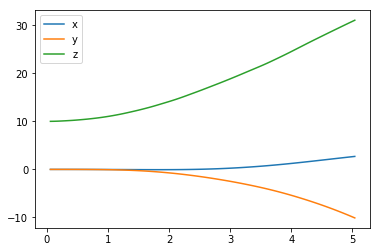

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

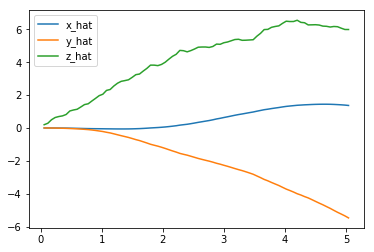

In [73]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

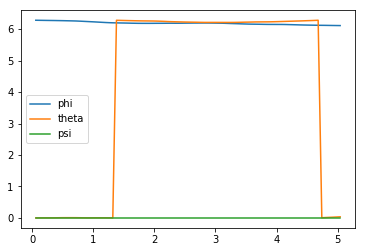

In [74]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

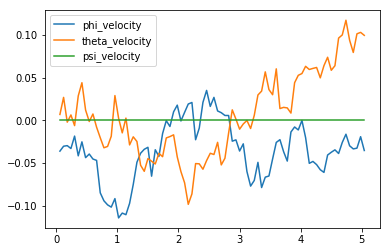

In [75]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

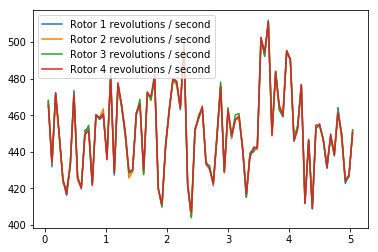

In [76]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [77]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  2.70340028 -10.09846163  31.05373246   6.11314383   0.03529871   0.        ]
[ 1.37030682 -5.47603686  5.99403347]
[-0.03521837  0.09939251  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [78]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.590 (best =   0.178), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [79]:
import sys
import pandas as pd
from agents.actor import Actor
from agents.ddpg import DDPG
import math

from land_task import Land_Task

num_episodes = 1000
target_pos = np.array([0., 0., 0.])
init_pose = np.array([0.,0.,10., 0., 0., 0.]) #Start in the sky

task = Land_Task(target_pos=target_pos, init_pose=init_pose)
agent = DDPG(task) 
best_reward = -float("inf")
best_episode_reward = -float("inf")
total_reward = 0

labels = ['episode','total_reward']
results = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    best_episode_reward = -float("inf")
    total_reward = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        if reward > best_episode_reward:
            best_episode_reward = reward
        if done:
            if best_episode_reward > best_reward:
                best_reward = best_episode_reward
            to_write = [i_episode] + [total_reward]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Cum Reward = {:4f} \n".format(i_episode, best_episode_reward, best_reward, total_reward), task.getPose(), "\n", end="")   # [debug]
            break
    sys.stdout.flush()


Episode =    1 Reward = 0.473677 Best Reward = 0.473677 Cum Reward = 2.328142 
 [-1.32830817  3.10584728  0.          1.88894901  3.82227052  0.        ] 
Episode =    2 Reward = 0.473731 Best Reward = 0.473731 Cum Reward = 2.328660 
 [-1.32859969  3.10536209  0.          1.88856821  3.82232023  0.        ] 
Episode =    3 Reward = 0.458035 Best Reward = 0.473731 Cum Reward = 2.327230 
 [-1.33351503  3.0955342   0.          1.62181136  3.79681692  0.        ] 
Episode =    4 Reward = 0.129566 Best Reward = 0.473731 Cum Reward = 0.952852 
 [ 1.35980523 -6.51762831  0.          1.04381721  4.07121253  0.        ] 
Episode =    5 Reward = 0.340067 Best Reward = 0.473731 Cum Reward = 1.546524 
 [-3.75910871  0.97389856  0.          3.83091919  3.46638883  0.        ] 
Episode =    6 Reward = 0.245404 Best Reward = 0.473731 Cum Reward = 1.671946 
 [ 2.54366122 -0.18444609  0.          1.02818586  2.17985024  0.        ] 
Episode =    7 Reward = 0.650806 Best Reward = 0.650806 Cum Reward = 1

Episode =   54 Reward = 0.234695 Best Reward = 0.879528 Cum Reward = 1.278292 
 [ 4.59201682  0.5508579   0.          4.26748193  5.34858156  0.        ] 
Episode =   55 Reward = 0.183565 Best Reward = 0.879528 Cum Reward = 1.225036 
 [ 4.23948964  0.43233976  0.          0.55994335  4.05434505  0.        ] 
Episode =   56 Reward = 0.207929 Best Reward = 0.879528 Cum Reward = 1.632545 
 [ 4.98874323  1.32073632  0.          2.16703134  4.20651628  0.        ] 
Episode =   57 Reward = 0.350422 Best Reward = 0.879528 Cum Reward = 1.328204 
 [ 1.06613596  1.20442514  0.          5.38696263  5.02334459  0.        ] 
Episode =   58 Reward = 0.296692 Best Reward = 0.879528 Cum Reward = 1.622166 
 [ 0.02021868  1.510626    0.          5.33174693  3.0137492   0.        ] 
Episode =   59 Reward = 0.263744 Best Reward = 0.879528 Cum Reward = 1.161715 
 [ 2.54835797  2.29501568  0.          0.85255949  4.36699886  0.        ] 
Episode =   60 Reward = 0.308235 Best Reward = 0.879528 Cum Reward = 1

Episode =  107 Reward = 0.225607 Best Reward = 0.879528 Cum Reward = 1.650502 
 [ 2.04897952  3.84663955  0.          2.14657789  5.14757972  0.        ] 
Episode =  108 Reward = 0.256341 Best Reward = 0.879528 Cum Reward = 1.779627 
 [-2.95653005 -1.18248007  0.          4.98387655  2.0840918   0.        ] 
Episode =  109 Reward = 0.201396 Best Reward = 0.879528 Cum Reward = 2.041571 
 [-2.01591562 -1.19524288  0.          5.44754998  2.1707647   0.        ] 
Episode =  110 Reward = 0.360349 Best Reward = 0.879528 Cum Reward = 1.931716 
 [-3.18396079 -1.75170756  0.          3.18978312  0.70878874  0.        ] 
Episode =  111 Reward = 0.881721 Best Reward = 0.881721 Cum Reward = 2.807067 
 [-0.71608857 -1.34067117  0.          5.41479842  1.66000971  0.        ] 
Episode =  112 Reward = 0.291103 Best Reward = 0.881721 Cum Reward = 1.703731 
 [-4.02751749 -2.87143043  0.          4.21489662  2.00393215  0.        ] 
Episode =  113 Reward = 0.338238 Best Reward = 0.881721 Cum Reward = 1

Episode =  160 Reward = 0.152146 Best Reward = 0.881721 Cum Reward = 1.059569 
 [-0.60297706 -2.86682499  0.          4.70711399  1.8985208   0.        ] 
Episode =  161 Reward = 0.333263 Best Reward = 0.881721 Cum Reward = 1.341146 
 [-1.26818699 -0.98116723  0.          6.26683025  3.85627147  0.        ] 
Episode =  162 Reward = 0.138494 Best Reward = 0.881721 Cum Reward = 1.656407 
 [-1.70192352 -5.92952991  0.          6.14045574  0.70638848  0.        ] 
Episode =  163 Reward = 0.118069 Best Reward = 0.881721 Cum Reward = 2.547867 
 [ -5.53488908  31.77751739   0.           3.91174152   5.58812432   0.        ] 
Episode =  164 Reward = 0.104148 Best Reward = 0.881721 Cum Reward = 1.550610 
 [ -3.23874823  21.15258714   0.           2.86767453   4.49182567   0.        ] 
Episode =  165 Reward = 0.087872 Best Reward = 0.881721 Cum Reward = 1.297998 
 [ -3.48481761  20.53420245   0.           0.51484503   4.70270417   0.        ] 
Episode =  166 Reward = 0.141764 Best Reward = 0.881

Episode =  212 Reward = 0.318685 Best Reward = 0.881721 Cum Reward = 1.975079 
 [ 0.40757632 -1.15078542  0.          1.99378554  2.92391545  0.        ] 
Episode =  213 Reward = 0.215243 Best Reward = 0.881721 Cum Reward = 1.503518 
 [-2.85097262  0.12475456  0.          0.85960945  0.3217582   0.        ] 
Episode =  214 Reward = 0.287398 Best Reward = 0.881721 Cum Reward = 1.911553 
 [-0.14871858  2.96506723  0.          1.339093    3.39026669  0.        ] 
Episode =  215 Reward = 0.191862 Best Reward = 0.881721 Cum Reward = 1.373943 
 [-3.64087051  1.89268365  0.          3.44194156  3.21367797  0.        ] 
Episode =  216 Reward = 0.279790 Best Reward = 0.881721 Cum Reward = 1.789502 
 [-3.78244021  1.90961418  0.          2.99526419  3.50026374  0.        ] 
Episode =  217 Reward = 0.445293 Best Reward = 0.881721 Cum Reward = 3.067678 
 [-0.42461036  1.77335711  0.          2.39720536  0.74601071  0.        ] 
Episode =  218 Reward = 0.245092 Best Reward = 0.881721 Cum Reward = 2

Episode =  265 Reward = 0.631850 Best Reward = 0.881721 Cum Reward = 2.213515 
 [ 0.72318697  0.37648962  0.          1.51275156  1.83428702  0.        ] 
Episode =  266 Reward = 0.546265 Best Reward = 0.881721 Cum Reward = 1.944547 
 [ 0.81019664 -0.37763304  0.          1.50092684  1.95562355  0.        ] 
Episode =  267 Reward = 0.356476 Best Reward = 0.881721 Cum Reward = 1.766640 
 [ 0.91534646 -1.63057609  0.          6.25242378  3.41466545  0.        ] 
Episode =  268 Reward = 0.223283 Best Reward = 0.881721 Cum Reward = 1.168291 
 [ 1.10113318 -2.66985322  0.          6.03790517  1.47509948  0.        ] 
Episode =  269 Reward = 0.298837 Best Reward = 0.881721 Cum Reward = 1.326869 
 [ 1.14520244 -3.19138309  0.          4.41144776  1.88458601  0.        ] 
Episode =  270 Reward = 0.193109 Best Reward = 0.881721 Cum Reward = 1.101556 
 [ 1.14257191 -3.19527116  0.          4.61663581  3.87764663  0.        ] 
Episode =  271 Reward = 0.192184 Best Reward = 0.881721 Cum Reward = 1

Episode =  318 Reward = 0.171660 Best Reward = 0.881721 Cum Reward = 1.139993 
 [ 3.32484106  7.14975326  0.          5.57041285  5.10730493  0.        ] 
Episode =  319 Reward = 0.133517 Best Reward = 0.881721 Cum Reward = 1.046796 
 [ 3.99526449  8.50704734  0.          0.61778735  3.99902446  0.        ] 
Episode =  320 Reward = 0.152117 Best Reward = 0.881721 Cum Reward = 0.974680 
 [ 1.01599302  9.83500107  0.          4.79289661  0.66769356  0.        ] 
Episode =  321 Reward = 0.077909 Best Reward = 0.881721 Cum Reward = 1.639398 
 [ -1.48699854  18.56609772   0.           3.11709964   3.15332812   0.        ] 
Episode =  322 Reward = 0.103029 Best Reward = 0.881721 Cum Reward = 1.436564 
 [ -1.64870805  18.94952961   0.           1.46733841   1.48068076   0.        ] 
Episode =  323 Reward = 0.156024 Best Reward = 0.881721 Cum Reward = 1.226682 
 [ 0.28635106  8.20297847  0.          5.63288269  3.39779428  0.        ] 
Episode =  324 Reward = 0.151195 Best Reward = 0.881721 Cu

Episode =  370 Reward = 0.238750 Best Reward = 0.881721 Cum Reward = 1.425993 
 [-3.86717223  1.05635358  0.          4.91928749  2.42571629  0.        ] 
Episode =  371 Reward = 0.184533 Best Reward = 0.881721 Cum Reward = 1.207716 
 [ 2.22536776  3.59874256  0.          0.70653405  5.79766676  0.        ] 
Episode =  372 Reward = 0.551775 Best Reward = 0.881721 Cum Reward = 1.738393 
 [-0.98480989 -0.12685015  0.          1.49754568  1.85217829  0.        ] 
Episode =  373 Reward = 0.124446 Best Reward = 0.881721 Cum Reward = 0.717082 
 [  2.30604009  14.14079605   0.           0.10720529   5.30014469   0.        ] 
Episode =  374 Reward = 0.255209 Best Reward = 0.881721 Cum Reward = 1.256165 
 [ 0.72778451 -3.15979875  0.          4.32161109  5.82477409  0.        ] 
Episode =  375 Reward = 0.084173 Best Reward = 0.881721 Cum Reward = 0.786150 
 [ 0.9252109  -5.71631456  0.          0.97332095  2.94605192  0.        ] 
Episode =  376 Reward = 0.184664 Best Reward = 0.881721 Cum Rewa

Episode =  423 Reward = 0.152922 Best Reward = 0.881721 Cum Reward = 0.959384 
 [ 0.84478533 -6.65810386  0.          5.47764807  0.11760975  0.        ] 
Episode =  424 Reward = 0.146554 Best Reward = 0.881721 Cum Reward = 1.015704 
 [ 1.1073782  -8.81816946  0.          1.94231027  1.14367502  0.        ] 
Episode =  425 Reward = 0.142761 Best Reward = 0.881721 Cum Reward = 0.841639 
 [ 0.86088616 -7.89398123  0.          3.69896322  5.01918136  0.        ] 
Episode =  426 Reward = 0.143150 Best Reward = 0.881721 Cum Reward = 0.850797 
 [ 0.95323177 -7.82123357  0.          3.68925087  4.05770479  0.        ] 
Episode =  427 Reward = 0.145602 Best Reward = 0.881721 Cum Reward = 0.786184 
 [ 1.00747389 -7.59598985  0.          3.69073757  0.52965574  0.        ] 
Episode =  428 Reward = 0.094988 Best Reward = 0.881721 Cum Reward = 0.895428 
 [ 0.60212072 -5.79774174  0.          0.86723894  5.29537708  0.        ] 
Episode =  429 Reward = 0.146839 Best Reward = 0.881721 Cum Reward = 0

Episode =  474 Reward = 0.284508 Best Reward = 0.881721 Cum Reward = 6.361011 
 [  8.25946505e-03   1.38838941e-01   1.38026836e+02   2.24106161e-03
   9.63708840e-04   0.00000000e+00] 
Episode =  475 Reward = 0.284508 Best Reward = 0.881721 Cum Reward = 6.361323 
 [  1.07309444e-01   2.07940126e-02   1.38026876e+02   2.24781650e-03
   6.27979359e+00   0.00000000e+00] 
Episode =  476 Reward = 0.284508 Best Reward = 0.881721 Cum Reward = 6.363254 
 [  2.17278482e-03  -3.42944605e-02   1.38027040e+02   6.28096560e+00
   2.65670291e-03   0.00000000e+00] 
Episode =  477 Reward = 0.284508 Best Reward = 0.881721 Cum Reward = 6.357900 
 [  8.31928512e-02   1.34520473e-01   1.38026835e+02   7.08580629e-03
   6.28090588e+00   0.00000000e+00] 
Episode =  478 Reward = 0.284508 Best Reward = 0.881721 Cum Reward = 6.358661 
 [ -1.41090669e-01   6.74139087e-02   1.38026856e+02   1.49318393e-03
   6.96546642e-03   0.00000000e+00] 
Episode =  479 Reward = 0.284508 Best Reward = 0.881721 Cum Reward = 6

Episode =  519 Reward = 2.719514 Best Reward = 2.719514 Cum Reward = 13.046081 
 [ -1.05522853e-07   1.61088220e-05   0.00000000e+00   6.28316752e+00
   6.28318517e+00   0.00000000e+00] 
Episode =  520 Reward = 2.719514 Best Reward = 2.719514 Cum Reward = 13.046081 
 [ -8.39500672e-08   1.61424924e-05   0.00000000e+00   6.28316748e+00
   6.28318520e+00   0.00000000e+00] 
Episode =  521 Reward = 2.719513 Best Reward = 2.719514 Cum Reward = 13.046079 
 [ -6.47611997e-08   1.64227211e-05   0.00000000e+00   6.28316717e+00
   6.28318523e+00   0.00000000e+00] 
Episode =  522 Reward = 2.719512 Best Reward = 2.719514 Cum Reward = 13.046075 
 [ -4.82689305e-08   1.68403417e-05   0.00000000e+00   6.28316671e+00
   6.28318525e+00   0.00000000e+00] 
Episode =  523 Reward = 2.719510 Best Reward = 2.719514 Cum Reward = 13.046068 
 [ -4.07679691e-08   1.75061172e-05   0.00000000e+00   6.28316598e+00
   6.28318526e+00   0.00000000e+00] 
Episode =  524 Reward = 2.719508 Best Reward = 2.719514 Cum Rewar

Episode =  563 Reward = 2.697471 Best Reward = 2.719514 Cum Reward = 12.983207 
 [  1.93705704e-07   5.30598725e-03   0.00000000e+00   6.27504373e+00
   6.28318298e+00   0.00000000e+00] 
Episode =  564 Reward = 2.683950 Best Reward = 2.719514 Cum Reward = 12.942905 
 [  2.16605863e-07   8.84230461e-03   0.00000000e+00   6.27011843e+00
   6.28318419e+00   0.00000000e+00] 
Episode =  565 Reward = 2.658179 Best Reward = 2.719514 Cum Reward = 12.865586 
 [  2.63715971e-07   1.56436901e-02   0.00000000e+00   6.26078710e+00
   6.28318529e+00   0.00000000e+00] 
Episode =  566 Reward = 2.605974 Best Reward = 2.719514 Cum Reward = 12.708132 
 [  3.01032158e-07   2.94565115e-02   0.00000000e+00   6.24206862e+00
   8.67671844e-07   0.00000000e+00] 
Episode =  567 Reward = 2.495554 Best Reward = 2.719514 Cum Reward = 12.373809 
 [  3.51903489e-07   5.83690031e-02   0.00000000e+00   6.20314248e+00
   1.63704853e-06   0.00000000e+00] 
Episode =  568 Reward = 2.465091 Best Reward = 2.719514 Cum Rewar

Episode =  608 Reward = 0.645492 Best Reward = 2.719514 Cum Reward = 4.711071 
 [ -2.11205893e-04   2.00001027e+00   0.00000000e+00   2.16664735e+00
   7.87199061e-03   0.00000000e+00] 
Episode =  609 Reward = 0.574710 Best Reward = 2.719514 Cum Reward = 4.671103 
 [  2.04433661e-10   1.99795940e+00   0.00000000e+00   1.91680630e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  610 Reward = 0.641022 Best Reward = 2.719514 Cum Reward = 4.709779 
 [ -1.95257786e-04   2.00009774e+00   0.00000000e+00   2.14421248e+00
   7.35580182e-03   0.00000000e+00] 
Episode =  611 Reward = 0.639404 Best Reward = 2.719514 Cum Reward = 4.710129 
 [ -1.86425431e-04   2.00016889e+00   0.00000000e+00   2.13570255e+00
   7.06048536e-03   0.00000000e+00] 
Episode =  612 Reward = 0.637579 Best Reward = 2.719514 Cum Reward = 4.710413 
 [ -1.78715705e-04   2.00005284e+00   0.00000000e+00   2.12585223e+00
   6.80081063e-03   0.00000000e+00] 
Episode =  613 Reward = 0.636030 Best Reward = 2.719514 Cum Reward = 4

Episode =  653 Reward = 0.611181 Best Reward = 2.719514 Cum Reward = 4.713830 
 [ -3.97466668e-05   1.99950137e+00   0.00000000e+00   1.99341651e+00
   1.73645373e-03   0.00000000e+00] 
Episode =  654 Reward = 0.610892 Best Reward = 2.719514 Cum Reward = 4.713580 
 [ -3.85328645e-05   1.99955316e+00   0.00000000e+00   1.99294950e+00
   1.68617431e-03   0.00000000e+00] 
Episode =  655 Reward = 0.609856 Best Reward = 2.719514 Cum Reward = 4.713783 
 [ -3.73582978e-05   1.99959922e+00   0.00000000e+00   1.99166656e+00
   1.63854057e-03   0.00000000e+00] 
Episode =  656 Reward = 0.574943 Best Reward = 2.719514 Cum Reward = 4.671798 
 [  4.26726112e-10   1.99949703e+00   0.00000000e+00   1.91733561e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  657 Reward = 0.609174 Best Reward = 2.719514 Cum Reward = 4.713200 
 [ -3.49026802e-05   1.99954985e+00   0.00000000e+00   1.99062599e+00
   1.53651289e-03   0.00000000e+00] 
Episode =  658 Reward = 0.609146 Best Reward = 2.719514 Cum Reward = 4

Episode =  698 Reward = 0.574660 Best Reward = 2.719514 Cum Reward = 4.670707 
 [  4.71349866e-10   1.99952275e+00   0.00000000e+00   1.91662067e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  699 Reward = 0.612970 Best Reward = 2.719514 Cum Reward = 4.716493 
 [ -1.30042629e-05   1.99927067e+00   0.00000000e+00   1.99461009e+00
   5.97619797e-04   0.00000000e+00] 
Episode =  700 Reward = 0.613310 Best Reward = 2.719514 Cum Reward = 4.716152 
 [ -1.28886072e-05   1.99926054e+00   0.00000000e+00   1.99511651e+00
   5.92267211e-04   0.00000000e+00] 
Episode =  701 Reward = 0.614279 Best Reward = 2.719514 Cum Reward = 4.717507 
 [ -1.27822988e-05   1.99929745e+00   0.00000000e+00   1.99634188e+00
   5.88061701e-04   0.00000000e+00] 
Episode =  702 Reward = 0.574558 Best Reward = 2.719514 Cum Reward = 4.670329 
 [  2.86086906e-10   1.99930251e+00   0.00000000e+00   1.91635275e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  703 Reward = 0.574987 Best Reward = 2.719514 Cum Reward = 4

Episode =  743 Reward = 0.699907 Best Reward = 2.719514 Cum Reward = 4.491001 
 [ -1.12566275e-05   2.01136558e+00   0.00000000e+00   3.57843338e+00
   6.50882198e-04   0.00000000e+00] 
Episode =  744 Reward = 0.730916 Best Reward = 2.719514 Cum Reward = 4.799634 
 [ -1.29642114e-05   2.00449676e+00   0.00000000e+00   2.79011053e+00
   7.10764029e-04   0.00000000e+00] 
Episode =  745 Reward = 0.569472 Best Reward = 2.719514 Cum Reward = 4.652280 
 [  4.25291859e-10   1.99326621e+00   0.00000000e+00   1.90560595e+00
   1.76747506e-11   0.00000000e+00] 
Episode =  746 Reward = 0.574016 Best Reward = 2.719514 Cum Reward = 4.669364 
 [  5.72931841e-09   1.99299990e+00   0.00000000e+00   1.91670627e+00
   6.28318530e+00   0.00000000e+00] 
Episode =  747 Reward = 0.669983 Best Reward = 2.719514 Cum Reward = 4.602345 
 [ -1.09483805e-05   2.00934295e+00   0.00000000e+00   3.38261018e+00
   7.17021413e-04   0.00000000e+00] 
Episode =  748 Reward = 0.653379 Best Reward = 2.719514 Cum Reward = 4

Episode =  788 Reward = 0.375539 Best Reward = 2.719514 Cum Reward = 3.699557 
 [ -9.25535650e-08   2.09344162e+00   0.00000000e+00   4.25519022e+00
   9.19677089e-05   0.00000000e+00] 
Episode =  789 Reward = 0.603448 Best Reward = 2.719514 Cum Reward = 5.352003 
 [ -2.66814148e-11  -1.51358711e-01   0.00000000e+00   4.69481848e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  790 Reward = 0.763312 Best Reward = 2.719514 Cum Reward = 4.244010 
 [ -8.85207101e-11   2.32339937e+00   0.00000000e+00   2.06752704e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  791 Reward = 0.912170 Best Reward = 2.719514 Cum Reward = 5.280370 
 [ -6.70927924e-09  -1.31460860e+00   0.00000000e+00   5.78037572e+00
   6.28318513e+00   0.00000000e+00] 
Episode =  792 Reward = 0.688807 Best Reward = 2.719514 Cum Reward = 5.338468 
 [  2.28515177e-06   2.22589551e+00   0.00000000e+00   3.41515504e+00
   1.72857151e-04   0.00000000e+00] 
Episode =  793 Reward = 0.352727 Best Reward = 2.719514 Cum Reward = 4

Episode =  833 Reward = 0.486706 Best Reward = 2.719514 Cum Reward = 3.754898 
 [  3.28845209e-10   2.94118324e+00   0.00000000e+00   3.85847325e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  834 Reward = 0.426673 Best Reward = 2.719514 Cum Reward = 4.474301 
 [  5.17635318e-11   2.34036616e+00   0.00000000e+00   3.72648341e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  835 Reward = 0.850093 Best Reward = 2.719514 Cum Reward = 6.463905 
 [ -2.16927004e-06   8.99275920e-01   0.00000000e+00   1.50599230e+00
   6.28316140e+00   0.00000000e+00] 
Episode =  836 Reward = 1.559419 Best Reward = 2.719514 Cum Reward = 5.965613 
 [ -8.82501896e-11  -4.13995598e-01   0.00000000e+00   3.90773691e-01
   6.28318531e+00   0.00000000e+00] 
Episode =  837 Reward = 0.713947 Best Reward = 2.719514 Cum Reward = 6.156664 
 [  3.20532590e-10   2.79994290e+00   0.00000000e+00   2.07256428e+00
   6.28318531e+00   0.00000000e+00] 
Episode =  838 Reward = 0.527462 Best Reward = 2.719514 Cum Reward = 4

Episode =  878 Reward = 1.161263 Best Reward = 2.719514 Cum Reward = 4.912040 
 [  6.34827398e-06   1.10570998e+00   0.00000000e+00   4.95246838e+00
   6.28318269e+00   0.00000000e+00] 
Episode =  879 Reward = 1.389131 Best Reward = 2.719514 Cum Reward = 6.329422 
 [  8.10758493e-06  -4.31041263e-01   0.00000000e+00   3.63664798e+00
   6.28308573e+00   0.00000000e+00] 
Episode =  880 Reward = 0.713734 Best Reward = 2.719514 Cum Reward = 4.177589 
 [  6.35542023e-06   1.79963039e+00   0.00000000e+00   4.86178017e+00
   6.28318257e+00   0.00000000e+00] 
Episode =  881 Reward = 0.623791 Best Reward = 2.719514 Cum Reward = 3.902879 
 [  6.34750065e-06   2.15943997e+00   0.00000000e+00   5.17586878e+00
   6.28317553e+00   0.00000000e+00] 
Episode =  882 Reward = 1.080817 Best Reward = 2.719514 Cum Reward = 5.943124 
 [  9.37646190e-06   4.36596402e-01   0.00000000e+00   1.06429598e+00
   6.28316622e+00   0.00000000e+00] 
Episode =  883 Reward = 0.562762 Best Reward = 2.719514 Cum Reward = 4

Episode =  923 Reward = 0.495752 Best Reward = 2.719514 Cum Reward = 4.761028 
 [  3.49927048e-07   2.58953791e+00   0.00000000e+00   1.14064319e+00
   6.28318354e+00   0.00000000e+00] 
Episode =  924 Reward = 1.495348 Best Reward = 2.719514 Cum Reward = 7.546133 
 [  4.22406853e-07  -2.95740910e-01   0.00000000e+00   3.16509843e+00
   6.28318167e+00   0.00000000e+00] 
Episode =  925 Reward = 0.498899 Best Reward = 2.719514 Cum Reward = 4.017361 
 [  5.38775169e-07   4.19643935e+00   0.00000000e+00   2.35346002e+00
   6.28318334e+00   0.00000000e+00] 
Episode =  926 Reward = 0.545914 Best Reward = 2.719514 Cum Reward = 4.081282 
 [  2.14321685e-07   2.68473666e+00   0.00000000e+00   2.90682057e+00
   6.28318469e+00   0.00000000e+00] 
Episode =  927 Reward = 0.505599 Best Reward = 2.719514 Cum Reward = 3.897601 
 [  1.96930200e-07   3.73945134e+00   0.00000000e+00   4.71084839e+00
   6.28318504e+00   0.00000000e+00] 
Episode =  928 Reward = 0.385144 Best Reward = 2.719514 Cum Reward = 3

Episode =  968 Reward = 0.536990 Best Reward = 2.719514 Cum Reward = 5.547901 
 [-0.05683491  0.11229854  0.          4.27978474  5.38813981  0.        ] 
Episode =  969 Reward = 0.822575 Best Reward = 2.719514 Cum Reward = 4.945571 
 [-0.86716901  0.27869287  0.          0.1534615   6.08424075  0.        ] 
Episode =  970 Reward = 0.285063 Best Reward = 2.719514 Cum Reward = 2.401037 
 [-3.87325194  1.79489605  0.          5.24234597  1.10746579  0.        ] 
Episode =  971 Reward = 0.141815 Best Reward = 2.719514 Cum Reward = 1.845494 
 [-4.15865682  8.62058752  0.          0.18678777  3.37548039  0.        ] 
Episode =  972 Reward = 0.560678 Best Reward = 2.719514 Cum Reward = 4.113984 
 [ -2.52909140e+00   1.81813655e-03   0.00000000e+00   6.27889331e+00
   3.76125434e+00   0.00000000e+00] 
Episode =  973 Reward = 0.514055 Best Reward = 2.719514 Cum Reward = 3.391212 
 [  3.43646831e+00   6.70876104e-04   0.00000000e+00   6.28163926e+00
   8.52619454e-01   0.00000000e+00] 
Episode 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

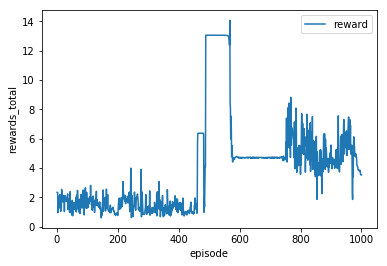

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['total_reward'], label='reward')
plt.xlabel('episode')
plt.ylabel('rewards_total')
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:The task is to land the quadcopter from an initial starting height of 10 .I designed the reward function in order to maximize the penality whenever the distance between the pose and target of the quadcopter is large.
I added decay factor which added to the total reward would eventually result in a reward of zero as the quad flew further from the ground plane.
Using  penalty factor and positive reward improved the learning results.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: 
1. I provided DDPG template with slight modifications to hyper parameters and Actor and Critic net architecture.
2. I used DDPG tamplets with slight modifications to some of the explorations parameters, changed $\theta$ to 0.075 , $\sigma$ to 0.1. and $\gamma$ to 0.15
3. I used the same model architecture but increased the units to 128,200 in the given template for actor and critic. 


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
1. It was hard to improve the reward function and learn the task. Also the hyperparamters influence on the reward function so I tried some  different parameters untill I will get plot which present good learning curve. 
2. It is possible to see that around episode 450 there is improvement, then again there is decreasing. but in total there is improvement in compare to the start point.
3. The final performance of the agent at the last 10 episodes are around 8.966890 compared to the first 10 episodes the performance are less.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: This part of the course is the most challenge one.
In this project the difficult part was to create reward function to learn the agent to achieve good implementation.
It was a very interesting project but still I feel that the course need to supply a better basis to understand the project because it confused-from where to start and what we need to achive. 

